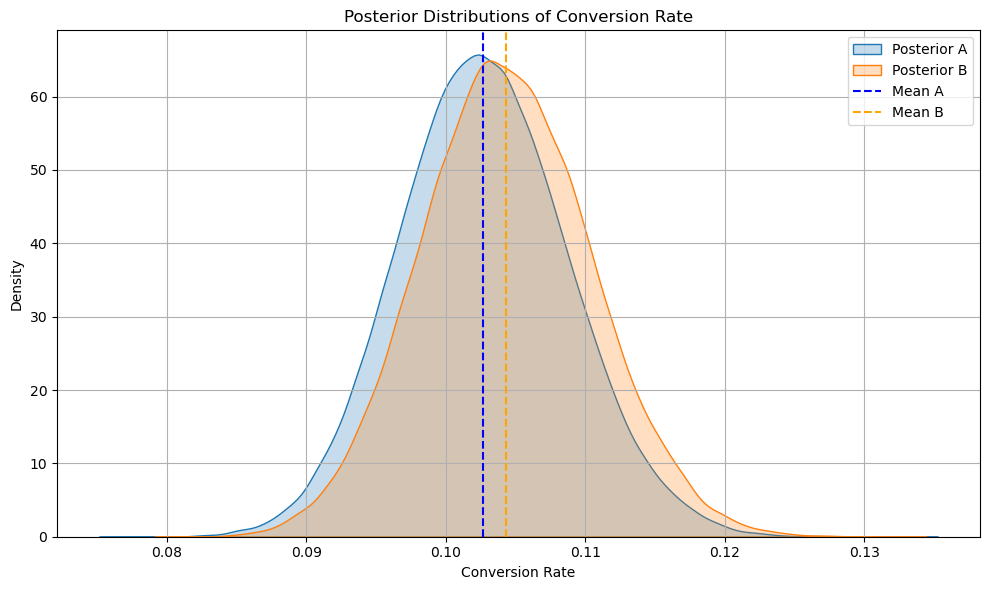

Posterior Mean A: 0.1027
Posterior Mean B: 0.1043
Probability B > A: 57.5560%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta

# Load the realistic dataset
df = pd.read_csv("realistic_bayesian_ab_test.csv")

# Aggregate conversions per variant
summary = df.groupby("variant")["converted"].agg(['sum', 'count']).rename(columns={'sum': 'conversions', 'count': 'users'}).reset_index()

# Extract data for each group
conv_a = summary.loc[summary['variant'] == 'A', 'conversions'].values[0]
users_a = summary.loc[summary['variant'] == 'A', 'users'].values[0]

conv_b = summary.loc[summary['variant'] == 'B', 'conversions'].values[0]
users_b = summary.loc[summary['variant'] == 'B', 'users'].values[0]

# Priors (uninformative)
alpha_prior = 1
beta_prior = 1

# Posterior parameters
alpha_a = alpha_prior + conv_a
beta_a = beta_prior + (users_a - conv_a)

alpha_b = alpha_prior + conv_b
beta_b = beta_prior + (users_b - conv_b)

# Simulate posterior samples
samples = 100_000
posterior_a = np.random.beta(alpha_a, beta_a, samples)
posterior_b = np.random.beta(alpha_b, beta_b, samples)

# Probability B is better than A
prob_b_beats_a = (posterior_b > posterior_a).mean()

# Plot
plt.figure(figsize=(10,6))
sns.kdeplot(posterior_a, label='Posterior A', fill=True)
sns.kdeplot(posterior_b, label='Posterior B', fill=True)
plt.axvline(x=np.mean(posterior_a), color='blue', linestyle='--', label='Mean A')
plt.axvline(x=np.mean(posterior_b), color='orange', linestyle='--', label='Mean B')
plt.title('Posterior Distributions of Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Results
print("Posterior Mean A: {:.4f}".format(np.mean(posterior_a)))
print("Posterior Mean B: {:.4f}".format(np.mean(posterior_b)))
print("Probability B > A: {:.4%}".format(prob_b_beats_a))

In [5]:
conv_a

256

In [3]:
import numpy as np
from scipy.stats import beta

# Simulated data: successes and trials for A and B
successes_a, trials_a = 50, 200
successes_b, trials_b = 70, 200

# Beta distribution for posterior
a_a, b_a = successes_a + 1, trials_a - successes_a + 1
a_b, b_b = successes_b + 1, trials_b - successes_b + 1

# Sample from posterior
samples_a = beta.rvs(a_a, b_a, size=10000)
samples_b = beta.rvs(a_b, b_b, size=10000)

# Probability that B is better than A
prob_b_better = np.mean(samples_b > samples_a)
print(f"Probability B is better: {prob_b_better:.3f}")

Probability B is better: 0.985


In [13]:
import numpy as np
from scipy.stats import beta


# Load the realistic dataset
df = pd.read_csv("realistic_bayesian_ab_test.csv")

# Aggregate conversions per variant
summary = df.groupby("variant")["converted"].agg(['sum', 'count']).rename(columns={'sum': 'conversions', 'count': 'users'}).reset_index()

# Simulated data: successes and trials for A and B
successes_a, trials_a = 256,2500
successes_b, trials_b = 260, 2500

# Beta distribution for posterior
a_a, b_a = successes_a + 1, trials_a - successes_a + 1
a_b, b_b = successes_b + 1, trials_b - successes_b + 1

# Sample from posterior
samples_a = beta.rvs(a_a, b_a, size=10000)
samples_b = beta.rvs(a_b, b_b, size=10000)

# Probability that B is better than A
prob_b_better = np.mean(samples_b > samples_a)
print(f"Probability B is better: {prob_b_better:.3f}")

Probability B is better: 0.576


In [11]:
summary.head()

,variant,conversions,users
0,A,256,2500
1,B,260,2500
